剑指 Offer 37. 序列化二叉树
请实现两个函数，分别用来序列化和反序列化二叉树。

示例: 

你可以将以下二叉树：

    1
   / \
  2   3
     / \
    4   5

序列化为 "[1,2,3,null,null,4,5]"

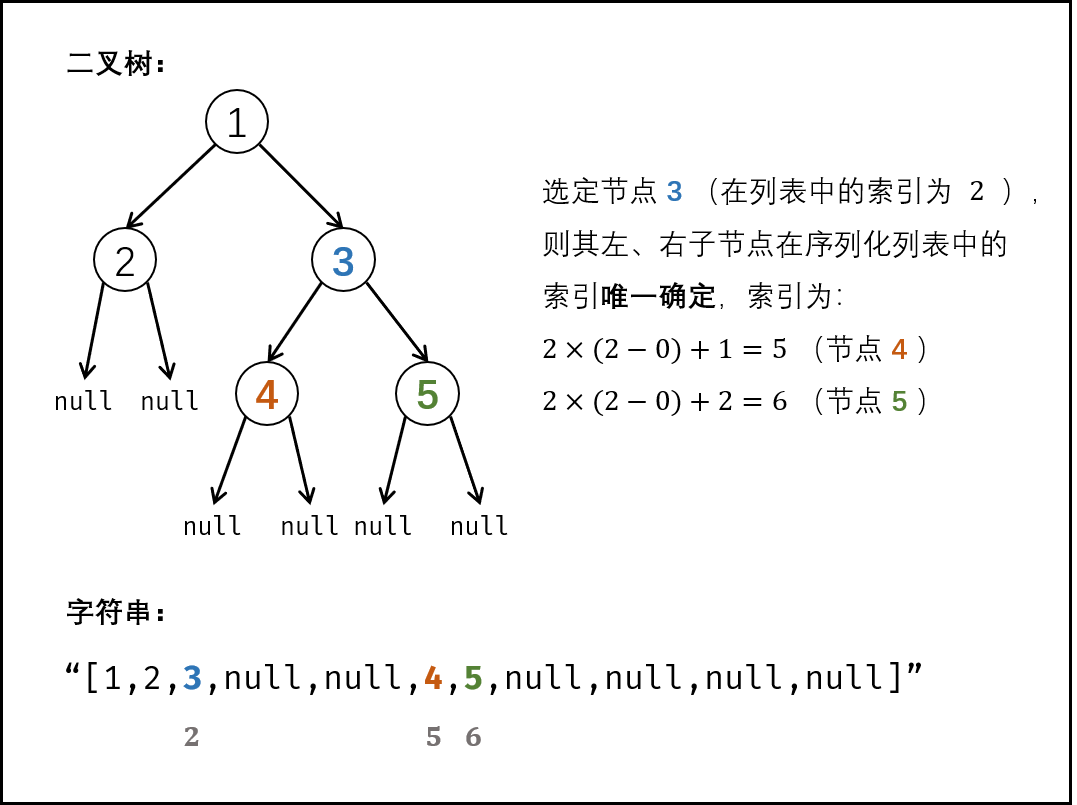

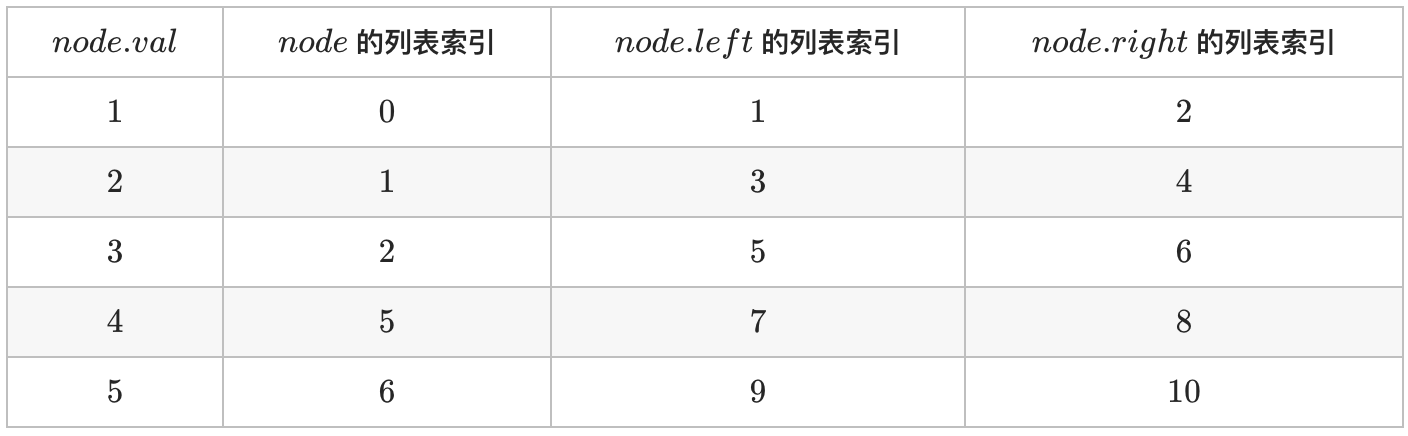

In [4]:
#序列化的字符串实际上是二叉树的 “层序遍历”（BFS）结果
#题目要求的 “序列化” 和 “反序列化” 是 可逆 操作。因此，序列化的字符串应携带 “完整的” 二叉树信息，即拥有单独表示二叉树的能力。
#为使反序列化可行，考虑将越过叶节点后的 null 也看作是节点。
#在此基础上，对于列表中任意某节点 node ，其左子节点 node.left和右子节点 node.right在序列中的位置都是 唯一确定 的。
from IPython.display import display,Image
image1=Image(filename='面试题37. 序列化二叉树（层序遍历 BFS ，清晰图解）1.png')
image2=Image(filename='面试题37. 序列化二叉树（层序遍历 BFS ，清晰图解）2.png')
display(image1,image2)

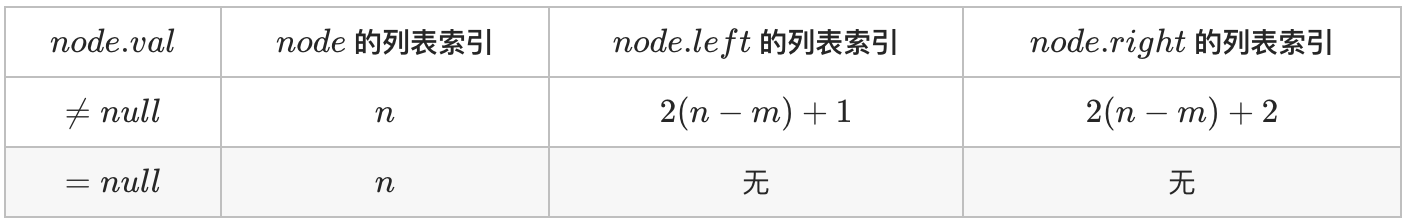

In [6]:
#设 m 为列表区间 [0, n]中空节点（即 null）的个数，则可总结出 node, node.left, node.right 在列表索引的对应关系:
image3=Image(filename='面试题37. 序列化二叉树（层序遍历 BFS ，清晰图解）3.png')
display(image3)

In [ ]:
#序列化 serialize ：
#借助队列，对二叉树做层序遍历，并将越过叶节点的 null也打印出来。

#算法流程：
#特例处理： 若 root 为空，则直接返回空列表 "[]" ；
#初始化： 队列 queue （包含根节点 root ）；序列化列表 res ；
#层序遍历： 当 queue 为空时跳出；
#节点出队，记为 node ；
#若 node 不为空：① 打印字符串 node.val ，② 将左、右子节点加入 queue ；
#否则（若 node 为空）：打印字符串 "null" ；
#返回值： 拼接列表（用 ',' 隔开，首尾添加中括号）。
#这似曾相似的操作啊！！想想32题！！

    def serialize(self, root):
        if not root: 
            return "[]"
        queue = collections.deque()
        queue.append(root)
        res = []
        while queue:
            node = queue.popleft()
            if node:
                res.append(str(node.val))
                queue.append(node.left)
                queue.append(node.right)
            else: 
                res.append("null")
        return '[' + ','.join(res) + ']'

#时间复杂度 O(N) ： N 为二叉树的节点数，层序遍历需要访问所有节点，最差情况下需要访问 N + 1个 null ，总体复杂度为 O(2N + 1) = O(N) 。
#空间复杂度 O(N) ： 最差情况下，队列 queue 同时存储 （N+1)/2 个节点（或 N+1个 nullnull ），使用 O(N) ；列表 res 使用 O(N)

In [ ]:
#反序列化 deserialize ：
#基于本文一开始分析的 “ node , node.left, node.right ” 在序列化列表中的位置关系，可实现反序列化。
#利用队列按层构建二叉树，借助一个指针 i 指向节点 node 的左、右子节点，每构建一个 node 的左、右子节点，指针 i 就向右移动 1 位。

#算法流程：
#特例处理： 若 data 为空，直接返回 null ；
#初始化： 序列化列表 vals （先去掉首尾中括号，再用逗号隔开），指针 i = 1，根节点 root （值为 vals[0]），队列 queue（包含 root ）；
#按层构建： 当 queue为空时跳出；
#节点出队，记为 node；
#构建 node 的左子节点：node.left的值为 vals[i]，并将 node.left 入队；
#执行 i+=1 ；
#构建 node 的右子节点：node.right 的值为 vals[i]，并将 node.right入队；
#执行 i+=1 ；
#返回值： 返回根节点 root 即可。

    def deserialize(self, data):
        if data == "[]": 
            return
        vals, i = data[1:-1].split(','), 1#先把序列化的string处理成数组
        root = TreeNode(int(vals[0]))
        queue = collections.deque()
        queue.append(root)
        while queue:
            node = queue.popleft()
            if vals[i] != "null":
                node.left = TreeNode(int(vals[i]))
                queue.append(node.left)
            i += 1
            if vals[i] != "null":
                node.right = TreeNode(int(vals[i]))
                queue.append(node.right)
            i += 1
        return root
#时间复杂度 O(N) ： N为二叉树的节点数，按层构建二叉树需要遍历整个 vals ，其长度最大为 2N+1 。
#空间复杂度 O(N) ： 最差情况下，队列 queuequeue 同时存储（N+1)/2 个节点，因此使用 O(N)额外空间。